<a href="https://colab.research.google.com/github/kkanishk26/Projects-/blob/main/Stock_Market_Performance_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
!pip install yfinance

In [4]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving stocks,upload.csv to stocks,upload.csv


In [3]:

import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stocks,upload.csv

In [5]:
import pandas as pd

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv('stocks,upload.csv')

In [7]:
df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,07/02/23,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,08/02/23,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,09/02/23,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,10/02/23,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,13/02/23,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [8]:
df.tail()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
243,GOOG,01/05/23,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,02/05/23,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,03/05/23,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,04/05/23,106.160004,106.300003,104.699997,105.209999,105.209999,19780600
247,GOOG,05/05/23,105.320000,106.440002,104.738998,106.214996,106.214996,20705300


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [10]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177506,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [11]:
import yfinance as yf
stock = yf.Ticker("AAPL")  # Using Apple's stock symbol
data = stock.history(period="1y")  # Fetching data for 1 year

In [12]:
data.dropna(inplace=True)  # This removes any rows with missing values

In [13]:
data.index = pd.to_datetime(data.index)

In [14]:
data['Daily Return'] = data['Close'].pct_change()

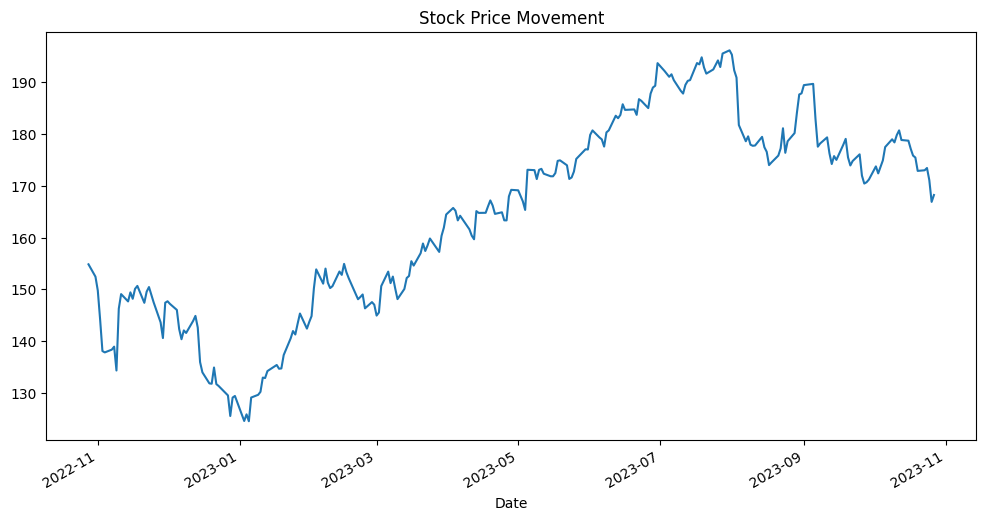

In [15]:
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(12, 6), title="Stock Price Movement")
plt.show()

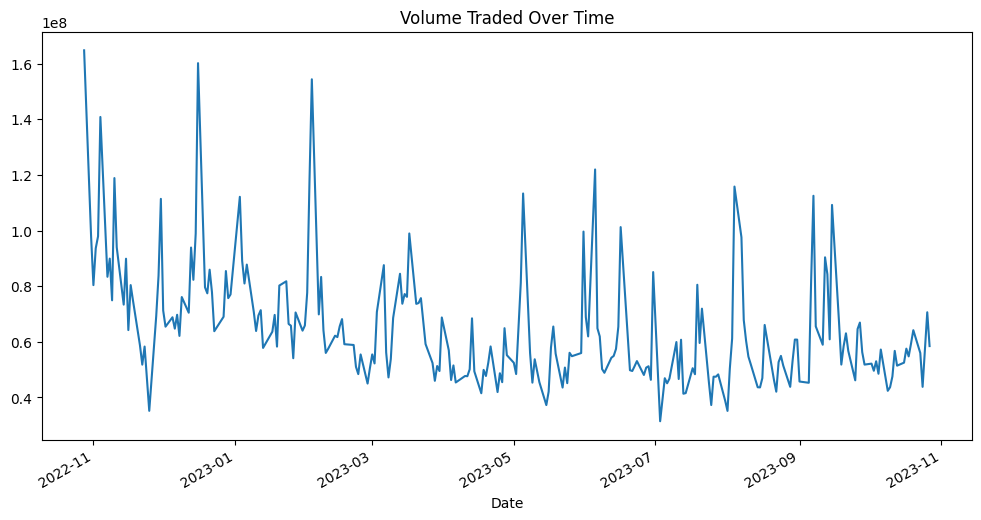

In [16]:
data['Volume'].plot(figsize=(12, 6), title="Volume Traded Over Time")
plt.show()

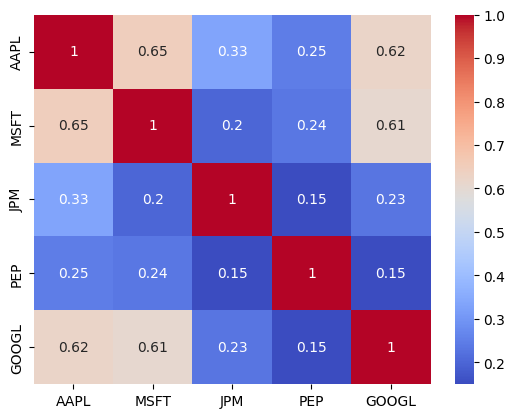

In [17]:
import seaborn as sns

stock_list = ["AAPL", "MSFT", "JPM", "PEP", "GOOGL"]
close_prices = pd.DataFrame()

for stock in stock_list:
   close_prices[stock] = yf.Ticker(stock).history(period="1y")['Close']

correlation = close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

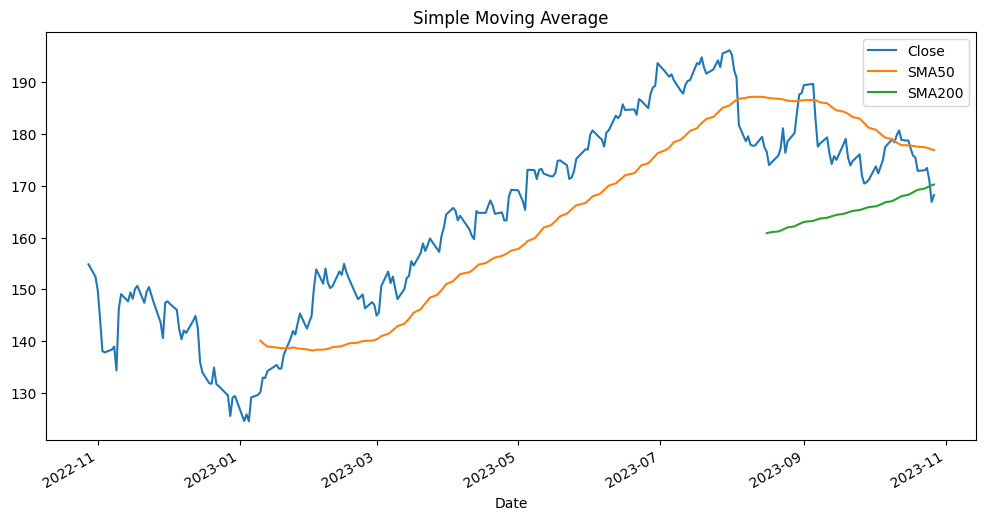

In [18]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

data[['Close', 'SMA50', 'SMA200']].plot(figsize=(12,6))
plt.title('Simple Moving Average')
plt.show()

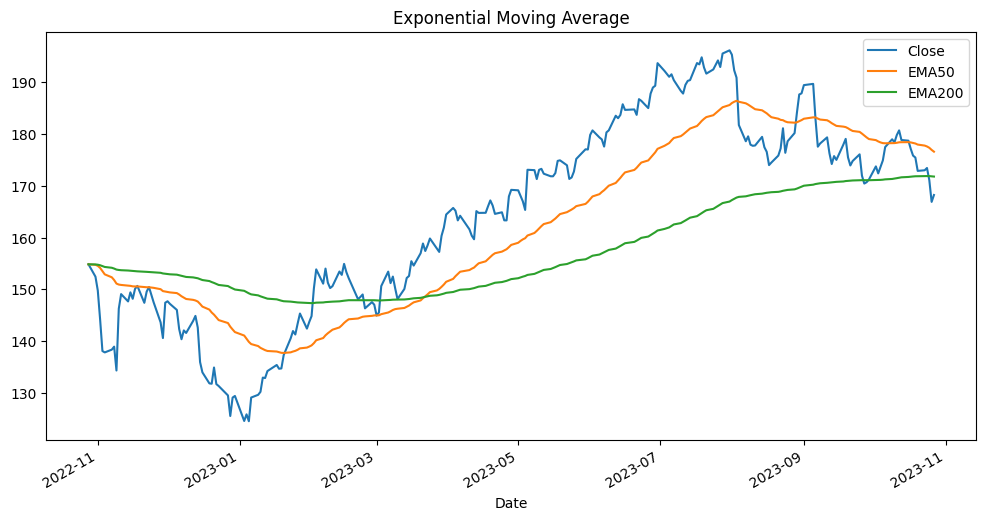

In [19]:
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

data[['Close', 'EMA50', 'EMA200']].plot(figsize=(12,6))
plt.title('Exponential Moving Average')
plt.show()





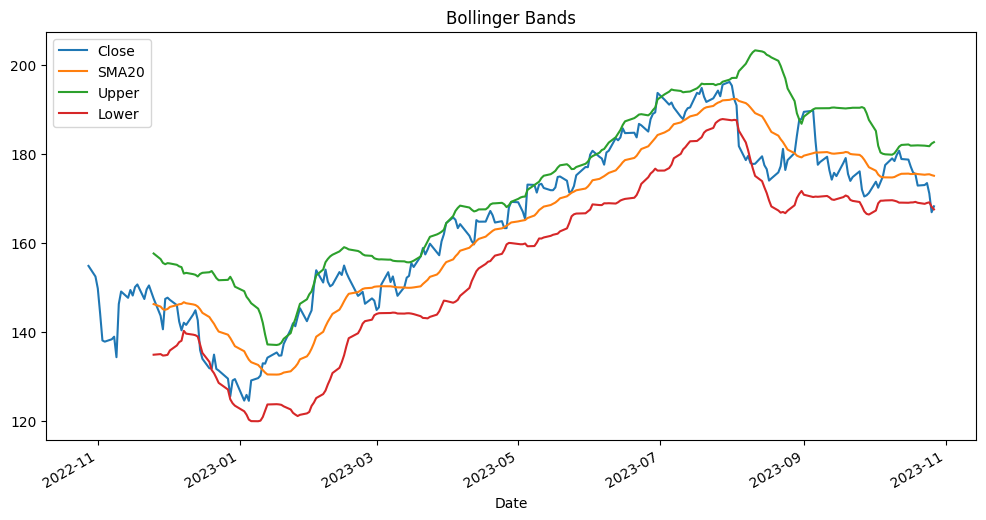

In [20]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA20'] + 2*data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA20'] - 2*data['Close'].rolling(window=20).std()

data[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(12,6))
plt.title('Bollinger Bands')
plt.show()

In [23]:
from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(data['Close'], order=(5,1,0))

results = model.fit(disp=0)

data['Forecast'] = results.predict(start=90, end=103, dynamic=True)


data[['Close', 'Forecast']].plot(figsize=(12,6))

plt.title('Stock Price Prediction using ARIMA')

plt.show()



NotImplementedError: ignored

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

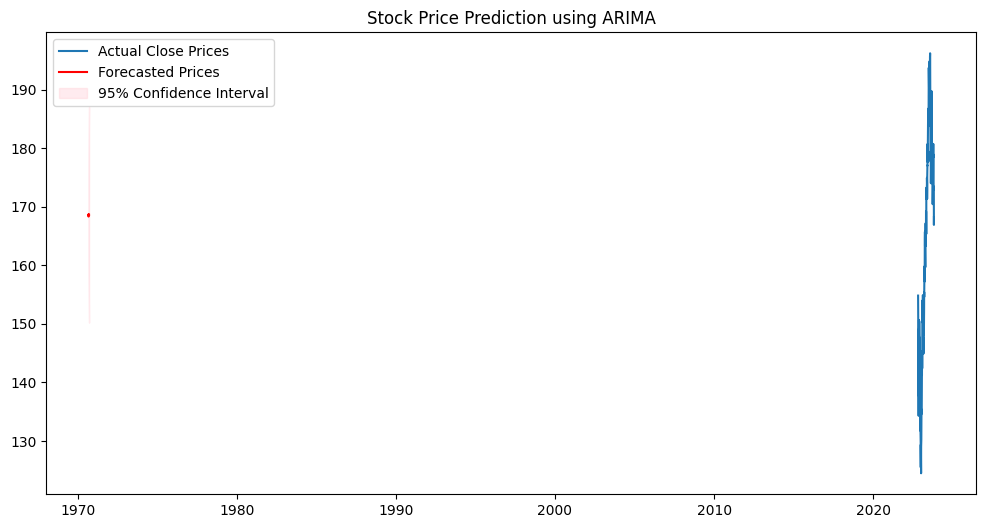

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your stock price data into a DataFrame
# Ensure your data has a time index

# Example data loading:
# data = pd.read_csv('your_data.csv')
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# Create and fit the ARIMA model
model = ARIMA(data['Close'], order=(5, 1, 0))
results = model.fit()

# Forecast the next 14 time periods
forecast = results.get_forecast(steps=14)

# Get the forecasted values and the confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the actual 'Close' prices and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Close Prices')
plt.plot(forecasted_values, label='Forecasted Prices', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('Stock Price Prediction using ARIMA')
plt.legend()
plt.show()


In [28]:
from scipy.optimize import minimize

# Assuming stock_list contains the symbols of the stocks in the portfolio
returns = close_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0178 # example value

# Portfolio optimization function
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
   returns = np.sum(mean_returns*weights ) *252
   std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
   return std, returns

# Minimize negative Sharpe Ratio to get optimal portfolio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
   p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
   return -(p_ret - risk_free_rate) / p_var

# Constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Running the optimization
initial = [1./len(stock_list) for stock in stock_list]
bounds = tuple((0, 1) for asset in range(len(stock_list)))
result = minimize(neg_sharpe_ratio, initial, args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

In [29]:
print("Optimal Portfolio Weights:")
print(result.x)  # Print the optimal weights for each asset

optimal_portfolio_std, optimal_portfolio_return = portfolio_annualised_performance(result.x, mean_returns, cov_matrix)
print(f"Expected Return: {optimal_portfolio_return:.4f}")
print(f"Standard Deviation: {optimal_portfolio_std:.4f}")
print(f"Sharpe Ratio: {(optimal_portfolio_return - risk_free_rate) / optimal_portfolio_std:.4f}")


Optimal Portfolio Weights:
[0.         0.78243259 0.20557135 0.         0.01199606]
Expected Return: 0.3329
Standard Deviation: 0.2375
Sharpe Ratio: 1.3269


In [27]:
import numpy as np